In [1]:
import numpy as np
from numpy import genfromtxt
import pandas as pd
from matplotlib import pyplot as plt
from keras.utils.np_utils import to_categorical
%matplotlib inline
finaldata = pd.read_csv('finaldata.csv')

Using TensorFlow backend.


In [2]:
finaldata.index

RangeIndex(start=0, stop=539, step=1)

In [3]:
finaldata.dtypes

proof.cut              float64
viscosity              float64
caliper                float64
ink.temperature        float64
humifity               float64
roughness              float64
varnish.pct            float64
press.speed            float64
ink.pct                float64
solvent.pct            float64
ESA.Voltage            float64
ESA.Amperage           float64
wax                    float64
hardener               float64
roller.durometer       float64
anode.space.ratio      float64
blade.pressure         float64
current.density        float64
chrome.content         float64
grain.screened          object
proof.on.ctd.ink        object
blade.mfg               object
paper.type              object
ink.type                object
direct.steam            object
solvent.type            object
type.on.cylinder        object
press.type              object
press                    int64
unit.number              int64
cylinder.size           object
paper.mill.location     object
plating.

In [4]:
cols = finaldata.columns[19:34]
cols

Index(['grain.screened', 'proof.on.ctd.ink', 'blade.mfg', 'paper.type',
       'ink.type', 'direct.steam', 'solvent.type', 'type.on.cylinder',
       'press.type', 'press', 'unit.number', 'cylinder.size',
       'paper.mill.location', 'plating.tank', 'band.type'],
      dtype='object')

In [5]:
cols
for i in cols:
    finaldata[i]=finaldata[i].astype('category')

In [6]:
finaldata[finaldata.columns[19:33]]

,grain.screened,proof.on.ctd.ink,blade.mfg,paper.type,ink.type,direct.steam,solvent.type,type.on.cylinder,press.type,press,unit.number,cylinder.size,paper.mill.location,plating.tank
0,yes,yes,benton,uncoated,uncoated,no,line,yes,motter94,821,2,tabloid,northus,1911
1,yes,yes,benton,uncoated,uncoated,no,line,yes,motter94,821,2,tabloid,northus,1910
2,yes,yes,benton,uncoated,coated,no,line,yes,woodhoe70,815,9,catalog,northus,1910
3,yes,yes,benton,uncoated,uncoated,no,line,yes,woodhoe70,816,9,catalog,northus,1910
4,no,yes,benton,uncoated,coated,no,line,yes,woodhoe70,816,2,tabloid,northus,1910
5,yes,yes,benton,uncoated,uncoated,no,line,yes,woodhoe70,816,2,catalog,northus,1910
6,no,yes,benton,coated,coated,no,line,yes,motter94,827,2,tabloid,canadian,1911
7,no,yes,benton,coated,coated,no,line,yes,motter94,827,9,tabloid,canadian,1911
8,yes,yes,benton,uncoated,uncoated,no,xylol,yes,albert70,802,7,catalog,northus,1910
9,yes,yes,benton,uncoated,uncoated,no,line,yes,woodhoe70,815,2,catalog,northus,1911


In [7]:
newdata = pd.get_dummies(data = finaldata[finaldata.columns[19:33]])
print(newdata.shape)

df1 = finaldata[finaldata.columns[0:19]]
y = finaldata[finaldata.columns[33]]
df = pd.concat([df1,newdata,y], axis = 1)
df.shape

(539, 48)


(539, 68)

In [8]:
df

,proof.cut,viscosity,caliper,ink.temperature,humifity,roughness,varnish.pct,press.speed,ink.pct,solvent.pct,...,cylinder.size_spiegel,cylinder.size_tabloid,paper.mill.location_canadian,paper.mill.location_mideuropean,paper.mill.location_northus,paper.mill.location_scandanavian,paper.mill.location_southus,plating.tank_1910,plating.tank_1911,band.type
0,0.631579,0.297297,0.167500,0.436090,0.437500,0.581152,0.365922,0.653846,0.264624,0.458599,...,0,1,0,0,1,0,0,0,1,band
1,0.631579,0.297297,0.417500,0.285714,0.479167,0.581152,0.184358,0.730769,0.387187,0.525478,...,0,1,0,0,1,0,0,1,0,noband
2,0.778947,0.135135,0.750000,0.360902,0.479167,0.540964,0.181564,0.711538,0.356546,0.566879,...,0,0,0,0,1,0,0,1,0,noband
3,0.568421,0.135135,0.417500,0.360902,0.375000,0.214660,0.156425,0.564231,0.406685,0.535032,...,0,0,0,0,1,0,0,1,0,noband
4,0.526316,0.297297,0.417500,0.436090,0.479167,0.581152,0.000000,0.807692,0.459610,0.652866,...,0,1,0,0,1,0,0,1,0,noband
5,0.526316,0.135135,0.335000,0.421053,0.395833,0.319372,0.240223,0.564231,0.356546,0.496815,...,0,0,0,0,1,0,0,1,0,noband
6,0.526316,0.297297,0.417500,0.398496,0.375000,0.581152,0.000000,1.000000,0.598886,0.493631,...,0,1,1,0,0,0,0,0,1,noband
7,0.526316,0.297297,0.167500,0.398496,0.375000,0.581152,0.000000,1.000000,0.598886,0.493631,...,0,1,1,0,0,0,0,0,1,noband
8,0.526316,0.270270,0.585000,0.060150,0.270833,0.581152,0.000000,0.634615,0.534819,0.566879,...,0,0,0,0,1,0,0,1,0,band
9,0.842105,0.216216,0.500000,0.360902,0.375000,0.790576,0.634078,0.673077,0.125348,0.312102,...,0,0,0,0,1,0,0,0,1,noband


In [9]:
#import random
from sklearn import cross_validation
#random.seed(123)
#random.random()
from sklearn.model_selection import train_test_split

x = df[df.columns[0:67]] 
y = df[df.columns[67]] 
x_train, x_test, y_train, y_test = cross_validation.train_test_split(x,y,test_size=0.2)



# train, val_test = train_test_split(finaldata, test_size=0.2)
# val, test = train_test_split(val_test, test_size=0.5)
# x_train = train[train.columns[0:33]] 
# y_train = train[train.columns[33]]
# #print(x_train,y_train)
# x_val = val[val.columns[0:33]] 
# y_val = val[val.columns[33]]

# x_test = test[test.columns[0:33]] 
# y_test = test[test.columns[33]]

C:\Users\hp\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [10]:
print(x_train, y_train)

     proof.cut  viscosity   caliper  ink.temperature  humifity  roughness  \
424   0.526316   0.135135  0.250000         0.285714  0.645833   0.581152   
506   0.449995   0.675676  0.417500         0.285714  0.520833   0.371728   
514   0.474854   0.297297  0.417500         0.436090  0.479167   0.162304   
139   0.473684   0.891892  0.542500         0.360902  0.479167   0.581152   
184   0.684211   0.513514  0.335000         0.323308  0.479167   0.476440   
329   0.210526   0.351351  0.250000         0.248120  0.395833   0.581152   
164   0.315789   0.891892  0.417500         0.210526  0.645833   0.581152   
190   0.473684   0.162162  0.500000         0.511278  0.354167   0.371728   
388   0.421053   0.162162  0.167500         0.285714  0.437500   0.581152   
54    0.315789   0.000000  0.250000         0.511278  0.583333   0.476440   
309   0.210526   0.567568  0.335000         0.285714  0.270833   0.790576   
392   0.421053   0.162162  0.167500         0.255639  0.354167   0.790576   

In [11]:
x_train

,proof.cut,viscosity,caliper,ink.temperature,humifity,roughness,varnish.pct,press.speed,ink.pct,solvent.pct,...,cylinder.size_catalog,cylinder.size_spiegel,cylinder.size_tabloid,paper.mill.location_canadian,paper.mill.location_mideuropean,paper.mill.location_northus,paper.mill.location_scandanavian,paper.mill.location_southus,plating.tank_1910,plating.tank_1911
424,0.526316,0.135135,0.250000,0.285714,0.645833,0.581152,0.000000,0.858846,0.495822,0.611465,...,0,0,1,1,0,0,0,0,1,0
506,0.449995,0.675676,0.417500,0.285714,0.520833,0.371728,0.173669,0.692308,0.410878,0.472695,...,0,1,0,0,0,1,0,0,0,1
514,0.474854,0.297297,0.417500,0.436090,0.479167,0.162304,0.143046,0.653846,0.394436,0.563092,...,1,0,0,0,0,1,0,0,0,1
139,0.473684,0.891892,0.542500,0.360902,0.479167,0.581152,0.000000,0.865385,0.309192,0.824841,...,0,0,1,0,0,0,1,0,1,0
184,0.684211,0.513514,0.335000,0.323308,0.479167,0.476440,0.000000,0.615385,0.598886,0.493631,...,1,0,0,0,0,1,0,0,0,1
329,0.210526,0.351351,0.250000,0.248120,0.395833,0.581152,0.000000,0.855769,0.598886,0.493631,...,0,0,1,0,1,0,0,0,0,1
164,0.315789,0.891892,0.417500,0.210526,0.645833,0.581152,0.000000,0.670000,0.529248,0.573248,...,0,1,0,0,0,1,0,0,1,0
190,0.473684,0.162162,0.500000,0.511278,0.354167,0.371728,0.494413,0.730769,0.089136,0.512739,...,0,0,1,0,0,1,0,0,0,1
388,0.421053,0.162162,0.167500,0.285714,0.437500,0.581152,0.407821,0.692308,0.208914,0.474522,...,0,0,1,0,0,1,0,0,0,1
54,0.315789,0.000000,0.250000,0.511278,0.583333,0.476440,0.000000,0.769231,0.598886,0.493631,...,0,1,0,1,0,0,0,0,0,1


In [12]:
#print(x_train.shape, x_val.shape, x_test.shape, y_train.shape, y_val.shape, y_test.shape)

In [13]:
y_train

424    noband
506      band
514      band
139    noband
184    noband
329    noband
164      band
190      band
388    noband
54     noband
309      band
392    noband
31     noband
121      band
304    noband
131    noband
37     noband
23       band
17     noband
146    noband
342      band
137    noband
465      band
410      band
275      band
396      band
312    noband
36       band
61     noband
236      band
        ...  
194    noband
116    noband
96     noband
389    noband
186    noband
376      band
289    noband
74     noband
100    noband
32     noband
215    noband
104      band
209      band
290    noband
317    noband
428    noband
220    noband
5      noband
105      band
493      band
29       band
303    noband
291    noband
76     noband
501      band
416    noband
108      band
233    noband
229      band
268    noband
Name: band.type, Length: 431, dtype: category
Categories (2, object): [band, noband]

In [14]:
from keras.models import Sequential
from keras.layers import Dense

In [15]:
print(x.shape)
print(y.shape)
print(type(x))
print(type(y))

(539, 67)
(539,)
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


In [16]:
y_train=[0 if i == 'band' else 1 for i in y_train]
y_test=[0 if i == 'band' else 1 for i in y_test]

In [17]:
print(y_train)

[1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 

In [18]:
print(y_test)

[1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1]


In [22]:
x_train = np.array(x_train)
y_train = np.array(y_train)
x_test = np.array(x_test)
y_test = np.array(y_test)

In [27]:
model = Sequential()
model.add(Dense(100,input_dim = 67, activation='relu'))
model.add(Dense(50))
#model.add(Dense(50))
# model.add(Dense(50))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss = 'binary_crossentropy', optimizer='adam', metrics= ['accuracy'])
%time model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 100)               6800      
_________________________________________________________________
dense_8 (Dense)              (None, 50)                5050      
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 51        
Total params: 11,901
Trainable params: 11,901
Non-trainable params: 0
_________________________________________________________________
Wall time: 0 ns


In [28]:
train_loss = []
test_loss = []
for i in range(100):
    model.fit(x_train, y_train, epochs = 1)
    trainloss = model.evaluate(x_train, y_train)[0]
    testloss = model.evaluate(x_test, y_test)[0]
    #recall = recall_score(y_train, y_train_pred)
    train_loss.append(trainloss)
    test_loss.append(testloss)
print(train_loss)
print(test_loss)

Epoch 1/1
 32/108 [=======>......................] - ETA: 0sEpoch 1/1


 32/108 [=======>......................] - ETA: 0s[0.63258564430710329, 0.58753167255295402, 0.55651038387258756, 0.53089960448426599, 0.51122715592107748, 0.49198093228992895, 0.47108092330171447, 0.45572280662518921, 0.43846063326240414, 0.43809814049306989, 0.41630064846468084, 0.40816831325986824, 0.38541501006781365, 0.38718512391546211, 0.35917817675043978, 0.37111765111682032, 0.36482068502156195, 0.31584336185123418, 0.30249922485749847, 0.29577828435499542, 0.27316711500736512, 0.27247937061670485, 0.25974032766857724, 0.24092481089993587, 0.22952572202737812, 0.2276692427089762, 0.22567666220001167, 0.21631106734275818, 0.19255660232286165, 0.18002929114963506, 0.1692550848227366, 0.15786798111662234, 0.15101232678735338, 0.15953729593836791, 0.14516526311981706, 0.12959100917984329, 0.12615734231582651, 0.12635573699828367, 0.11700186074609822, 0.1392311222868563, 0.10390577575930864, 0.099695146550573502, 0.089279824716585701, 0.083793248246551391, 0.079243852806616819, 0.0

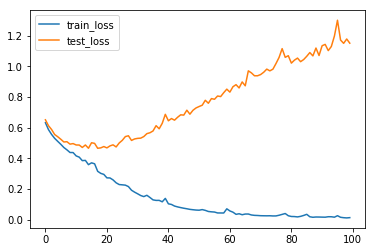

In [29]:
plt.plot(train_loss, label = 'train_loss')
plt.plot(test_loss, label = 'test_loss')
plt.legend()

In [112]:
model.fit(x_train, y_train, epochs = 50, validation_split=0.2)

Train on 344 samples, validate on 87 samples
Epoch 1/50
344/344 [==============================] - 0s - loss: 0.7358 - acc: 0.5174 - val_loss: 0.6395 - val_acc: 0.6552
Epoch 2/50
344/344 [==============================] - 0s - loss: 0.6356 - acc: 0.6453 - val_loss: 0.6038 - val_acc: 0.6667
Epoch 3/50
344/344 [==============================] - 0s - loss: 0.5812 - acc: 0.7151 - val_loss: 0.5631 - val_acc: 0.6782
Epoch 4/50
344/344 [==============================] - 0s - loss: 0.5475 - acc: 0.7238 - val_loss: 0.5513 - val_acc: 0.7126
Epoch 5/50
344/344 [==============================] - 0s - loss: 0.5268 - acc: 0.7529 - val_loss: 0.5396 - val_acc: 0.6782
Epoch 6/50
344/344 [==============================] - 0s - loss: 0.5066 - acc: 0.7500 - val_loss: 0.5393 - val_acc: 0.7011
Epoch 7/50
344/344 [==============================] - 0s - loss: 0.4906 - acc: 0.7645 - val_loss: 0.5402 - val_acc: 0.7471
Epoch 8/50
344/344 [==============================] - 0s - loss: 0.4831 - acc: 0.7674 - val_lo

In [39]:

y_test_pred = model.predict_classes(x_test)
y_test_pred

 32/108 [=======>......................] - ETA: 0s

array([[0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
    

In [114]:
y[29]

'band'

In [21]:
from sklearn.metrics import recall_score
recall_score(y_test,y_test_pred) 

NameError: name 'y_test_pred' is not defined